# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats

import seaborn as sns
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-31o50alv because the default path (/home/ahmed/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [4]:
charges = medical.charges

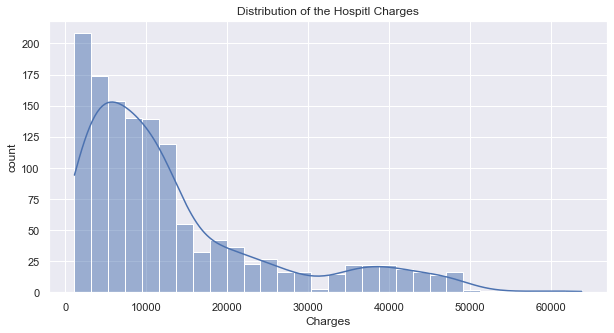

In [5]:
sns.set()
_ = plt.figure(figsize=(10, 5))
_ = sns.histplot(charges, kde=True)
_ = plt.xlabel('Charges')
_ = plt.ylabel('count')
_ = plt.title('Distribution of the Hospitl Charges')


In [6]:
pop_chrges_mean = charges.mean()
pop_chrges_std = np.std(charges)

print(f' The charges mean = {pop_chrges_mean}, and std= {pop_chrges_std}')

 The charges mean = 13270.422265141257, and std= 12105.484975561605


**We can not claim that these statistics represent the entire population parameters.This is only a sample not the entire population.**

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

The data can be considered as a random sample from population. The sample size is of 1338 observations which is is sufficient to apply a statistical test like z-test or t-test to compare the charges mean with the value of concern, 1200. We use t-test because we do not know the population standard deviation. However, z-test can produce the same conclusion since the sample size is sufficiently large.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

To verify the administration concern that the charges has fallen bellow 12,000 we use a one-sided interval to infer the lowest extreme possible charge, and compare it to 12,000. This extreme low value is inferred within a certain confidence interval, e.g.$ CI_{95} = 95$ % and significant level $\alpha = 0.05$.

The hypothesis for such a test can be:
- The null hypothesis, H0: m = 12,000 -> indicates that the charges mean is equal to 12,000.
- The alternative hypothesis, H1: m < 12,000 -> the mean of charges values is less than 12,000.

**Follwing is calculating the the 95% confidence interval**

In [7]:
seed(47)
# generating a bootstrap of the mean of charges by smapling with replacement 
bootstrap = pd.DataFrame({'meancharge': [charges.sample(1338,replace=True).mean()\
                                         for i in range(1000)]})

In [8]:
bootstrap.head()

,meancharge
0,13386.798875
1,13227.452791
2,13445.339452
3,13474.935851
4,13150.880772


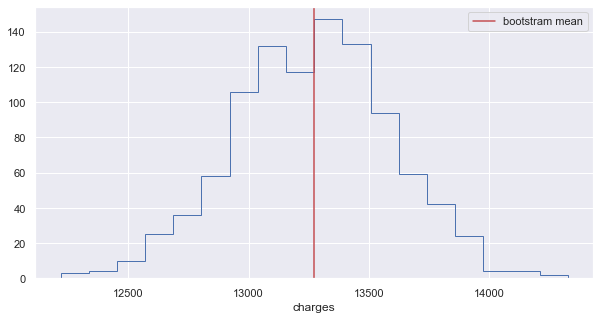

In [9]:
_ = plt.figure(figsize=(10, 5))
bootstrap.meancharge.hist(histtype='step', bins=18)
mean = charges.mean()
m = plt.axvline(mean,color='C3')
_ = plt.xlabel('charges') 
_ = plt.legend([m], ['bootstram mean'])
plt.show()

In [10]:
print(f' The 5th Percentile = {bootstrap.meancharge.quantile(0.05)}')

 The 5th Percentile = 12725.662540446594


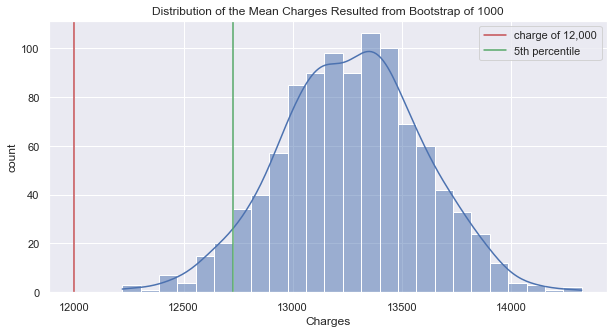

In [11]:
fifth_p = bootstrap.meancharge.quantile(0.05)
_ = plt.figure(figsize=(10, 5))
_ = sns.histplot(bootstrap.meancharge, kde=True)
fifth = plt.axvline(fifth_p,color='g')
c = plt.axvline(12_000,color='r')

_ = plt.xlabel('Charges')
_ = plt.ylabel('count')
_ = plt.legend([c, fifth], ['charge of 12,000', '5th percentile'])

_ = plt.title('Distribution of the Mean Charges Resulted from Bootstrap of 1000')

Based on value of the 5th percentile of charges (= 12725.662540446594), we can infer, with 95% confidence, that the mean of charges is at least (12725.66), which is greater than the administration concern of below 12,000 

**We can use t test to confirm the one sided 95% confidence interval**

In [16]:
t_critical2 = t.ppf(q = 0.975, df=len(charges)-1)  # Get the t-critical value*
print("t-critical value:")                  # Check the t-critical value
print(t_critical2, '\n')                        


sigma = np.std(charges, ddof=1)/np.sqrt(len(charges))  # Standard deviation estimate
margin_of_error = t_critical2 * sigma

confidence_interval2 = (charges.mean() - margin_of_error, charges.mean() + margin_of_error)  

print("95% Two-Sided Confidence interval of the charges mean:")
print(confidence_interval2, '\n')

t_critical1 = t.ppf(q = 0.95, df=len(charges)-1)  # Get the t-critical value*
print("t-critical for one sided value:")                  # Check the t-critical value
print(t_critical1, '\n')                        


sigma = np.std(charges, ddof=1)/np.sqrt(len(charges))  # Standard deviation estimate
margin_of_error = t_critical1 * sigma

confidence_interval1 = (charges.mean() - margin_of_error)  



print("99% Left side Confidence interval of the charges mean:")
print(confidence_interval1, '\n')




t-critical value:
1.961739888600845 

95% Two-Sided Confidence interval of the charges mean:
(12620.954034192644, 13919.890496089869) 

t-critical for one sided value:
1.6459941145571317 

99% Left side Confidence interval of the charges mean:
12725.48718381623 



The 99% left side confidence interval indicates lower bound of the mean. If many samples are collected and the confidence interval computed, in the long run about 99 % of the time the true mean would be greater than or equal the lower bound of the interval, 12725.48718381623.

#### Using scipy stats model to confirm the two-sided confidence interval

In [17]:
t.interval(alpha=0.95, df=1337, loc=charges.mean(), scale=np.std(charges, ddof=1)/np.sqrt(len(charges)))

(12620.954034192644, 13919.890496089869)

#### Confirm by applying one-side z test
 $$H_0: mean charges = 12000$$
 $$H_1: mean charges < 12000$$
 $CI_{95} = 95$ % and significant level $\alpha = 0.05$.
 
 We will use the weightstats module from statsmodels.stats

In [18]:
# import ztest in weightstats module from statsmodels.stats
from statsmodels.stats import weightstats as stests
z_test, p_value = stests.ztest(x1=charges, x2=None, value=12000, alternative='smaller')
print(f'z test statistic = {z_test}, p value = {p_value}')
if p_value < 0.05:
    print('we reject the null hypothesis')
else:
    print('we accept the null hypothesis')        

z test statistic = 3.8373517196585314, p value = 0.9999378158579459
we accept the null hypothesis


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

- **Null Hypothesis:** charges with insurance and without insurance are equal
- **Alternative Hypothesis:** charges with insurance and without insurance are different

T-test assumes homogeneity of variance, where the variances of the two groups (charge with insurance and charge without insurance) are equal in the population.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__

Lets first explore the data

In [19]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [20]:
mask = medical.insuranceclaim == 1

charge_insurance = medical[mask]['charges']
charge_no_insurance = medical[~mask]['charges']
charge_insurance.name = 'insured'
charge_no_insurance.name = 'not_insured'

print(f'sample size for:\n insured: {len(charge_insurance)}\n not insured {len(charge_no_insurance)}')

sample size for:
 insured: 783
 not insured 555


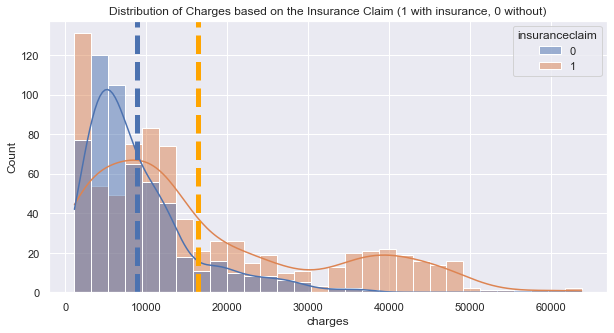

In [21]:
_ = plt.figure(figsize=(10, 5))
_ = sns.histplot(x = 'charges', kde=True, hue='insuranceclaim', data= medical)
_ = plt.axvline(np.mean(charge_insurance), color='orange', linestyle='dashed', linewidth=5)
_ =plt.axvline(np.mean(charge_no_insurance), color='b', linestyle='dashed', linewidth=5)
_ = plt.title('Distribution of Charges based on the Insurance Claim (1 with insurance, 0 without)')
plt.show()

The size of each group:

In [22]:
medical.insuranceclaim.value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

Review of the summary statistics of each group

In [23]:
insurance= medical.copy()
insurance['insuranceclaim'] = insurance.insuranceclaim.map({1: 'insured', 0: 'not_insured'})

In [24]:
insurance.groupby('insuranceclaim')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
insuranceclaim,,,,,,,,
insured,783.0,16423.928277,14045.928419,1131.5066,5733.288925,11538.42100,23484.788875,63770.42801
not_insured,555.0,8821.421892,6446.510127,1121.8739,4445.337575,6933.24225,11424.211575,36910.60803


Create two Pandas Series data sets for the two groups

Calculate the pooled standard deviation of the two groups using this formula: $ s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}$

and the *t*-test statistic using: $t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}$.


In [25]:
# pooled standard deviation of the two groups
n0 = len(charge_insurance) # size of group 0, the insured
x0 = np.mean(charge_insurance) # mean of group 0
s0 = np.std(charge_insurance, ddof=1) # unbiased standard deviation
v0 = np.var(charge_insurance, ddof=1) # unbiased variance

# same for group 1
n1 = len(charge_no_insurance) # size of group 1, with out insurance
x1 = np.mean(charge_no_insurance)
s1 = np.std(charge_no_insurance, ddof=1)
v1 = np.var(charge_no_insurance, ddof=1)

df = n0 + n1 - 2 # degree of freedom


# the poopled standard deviation formula 
sp = np.sqrt(((n0 - 1) * v0 + (n1 - 1) * v1)/df)

# the t statistic formula 
t_value = (x0 - x1) / (sp * np.sqrt(1/n0 + 1/n1))


#p-value after comparison with the t 
p = 1 - t.cdf(t_value,df=df)
print("t = " + str(t_value))
print("p = " + str('%E' % Decimal(p)))

t = 11.89329903087671
p = 0.000000E+00


### Calculating t statistics and p value using scipy.stats.ttest_ind( ) 

In [26]:
t2, p2 = scipy.stats.ttest_ind(charge_insurance,charge_no_insurance)
print("t = " + str(t2))
print("p = " + str(p2))


t = 11.893299030876712
p = 4.461230231620717e-31


### Calculating t statistics and p value using researchpy module 

In [27]:
import researchpy
des, res = researchpy.ttest(charge_insurance, charge_no_insurance)

des

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,insured,783.0,16423.928277,14045.928419,501.960531,15438.578650,17409.277903
1,not_insured,555.0,8821.421892,6446.510127,273.639115,8283.924817,9358.918968
2,combined,1338.0,13270.422265,12110.011237,331.067454,12620.954034,13919.890496


In [28]:
res

,Independent t-test,results
0,Difference (insured - not_insured) =,7602.5064
1,Degrees of freedom =,1336.0000
2,t =,11.8933
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,0.6599
7,Hedge's g =,0.6596
8,Glass's delta =,0.5413
9,r =,0.3094


Using direct coding as well as scipy.stats and researchpy modules gave the same values of t statistic = 11.8933 and p value approximately = 0 

**Bases on a Student's independent samples  t -test, with this low p vale we reject the null hypothesis of equal means, and infer that the mean difference of 7602.5064 between charges with and without insurance is significant. \begin{equation}
( t(1338)=11.8933 ,  p<.05 ,  d=.66 ),\end{equation} suggesting that a genuine difference in charges for those with insurance claim and the ones without.**


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

In general, z test based on z distribution is used when the standard deviation of the population is know, in most cases this is not the case. Thus, t test based on t distribution is used instead. However, with increasing the sample size the t distribution approaches the z distribution and both test would give the same results with a large sample size.

Z test can be found in the weightstats of the statsmodels.stats module, and can be imported as:
```python
from statsmodels.stats import weightstats as stests
```

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test